# A3a: Signals and Noise
Finn Hittson - fxh157  
CSDS 464  
Due: February 27th, 2023

## 1. Continuous signals and sampling

### 1a. Sampled functions

In [1]:
import A3a_fxh157 as a3a
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import IPython

import sys
sys.path.append('../464-A1b_fxh157_files/')
import A1b_fxh157 as a1b

a3a.plot_sampled_function(g=a1b.sinewave, fs=1000, tlim=(0, 6), tscale=0.001, tunits="msec", title="Sinewave", f=500)

a3a.plot_sampled_function(g=a1b.gabore, fs=3, tlim=(-0.03, 0.03), tscale=0.01, tunits="ms", f=100, a=0.106, sigma=0.01)

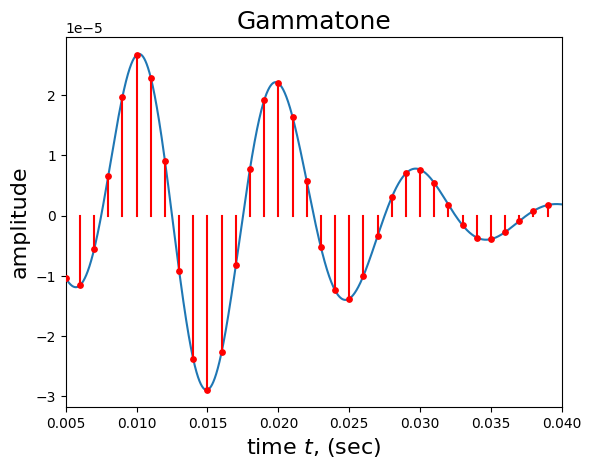

In [2]:
a3a.plot_sampled_function(g=a1b.gammatone, fs=1000, tlim=(5/1000,40/1000), tscale=1, tunits="sec", title="Gammatone", f=100)

### 1b. The Nyquist frequency and aliasing

a3a.plot_sampled_function(g=a1b.sinewave, fs=5, tlim=(0, 6), tscale=1.3, tunits="msec", f=1)

a3a.plot_sampled_function(g=a1b.sinewave, fs=2, tlim=(0, 6), tscale=1, tunits="msec", f=1)

a3a.plot_sampled_function(g=a1b.sinewave, fs=2, tlim=(0, 6), tscale=1, tunits="msec", f=1, d=0.25)

a3a.plot_sampled_function(g=a1b.sinewave, fs=1000, tlim=(0, 20), tscale=0.001, tunits="msec", title="Cosine", f=1100, d=0.25/5)

## 2. Signals

### 2a. Delta and step functions

a3a.plot_delta_step(t=10, fs=2, g=a3a.d, plot_type="stem")

a3a.plot_delta_step(t=10, fs=2, g=a3a.u, plot_type="stem")

### 2b. `gensignal`

6
t0, y0 = a3a.gensignal(t=0, g=a3a.u, fs=500, tau=50, T=25, tscale=0.001)
zeros = np.zeros(10)
y = np.concatenate((zeros, y0, zeros))
t = np.arange(30, 2*30+len(y)+2, 2)
a3a.plot_stem(t0, y0, title="Step Function", time_units="msec")

t0, y0 = a3a.gensignal(t=0, g=a3a.u, fs=1, tau=2, T=2, tscale=1)
bz = np.zeros(2)
az = np.zeros(1)
y = np.concatenate((bz, y0, az))
t = np.arange(0, 5, 1)
a3a.plot_stem(t, y, title="Step Function", time_units="msec")

t, y = a3a.gensignal(t=0, g=a1b.gammatone, fs=100, tau=0, T=0.06, f=100)
a3a.plot_stem(t, y, title="Gammatone")

## 3. Noise and SNR

### 3a. `energy`, `power`, and `snr`

def energy(x):
    return np.linalg.norm(x)**2

def power(x):
    return np.linalg.norm(x)**2/len(x)

def snr(Ps, Pn):
    return Ps/Pn

t0, y0 = a3a.gensignal(t=0, g=a1b.sinewave, fs=100, tau=0, T=1, tscale=1, f=1)
print(f"sinewave energy: {a3a.energy(y0)}")
print(f"sinewave power: {a3a.power(y0)}")
a3a.plot_stem(t0, y0, title="Sinewave", time_units="sec")

t0, y0 = a3a.gensignal(t=0, g=a1b.gammatone, fs=1000, tau=5/1000, T=40/1000, tscale=1, f=100)
print(f"gammatone energy: {a3a.energy(y0)}")
print(f"gammatone power: {a3a.power(y0)}")
a3a.plot_stem(t0, y0, title="Gammatone", time_units="sec")

### 3b. Noisy signals

t, y, n = a3a.noisysignal(t=0, g=a1b.sinewave, fs=1000, tau=0, T=5, s=0.2)
a3a.plot_noisysignal(t, y+n, "Sinusodial")

t, y, n = a3a.noisysignal(t=-5, g=a3a.u, fs=500, tau=0, T=5, s=0.1)
a3a.plot_noisysignal(t, y+n, "Step Function")

t, y, n = a3a.noisysignal(t=0, g=a1b.gammatone, fs=1000, tau=0, T=0.06, s=0.000025, f=100)
a3a.plot_noisysignal(t, y+n, title="Gammatone")

### 3c. Noise level specified by SNR

sigma = 0
for _ in range(100):
    t, _, n = a3a.noisysignal(t=0, g=a1b.sinewave, fs=1000, tau=0, T=5, s=0.2)
    _, x, _ = a3a.noisysignal(t=0, g=a1b.sinewave, fs=1000, tau=0, T=5, s=0)
    Ps = a3a.power(x)
    Pn = a3a.power(n)
    SNR = a3a.snr(Ps, Pn)
    sigma += a3a.snr2sigma(x, snr=SNR)
print(sigma/100)

10*math.log10(20)

### 3d. Estimating SNR

fs = 1000
tau = 0
T = 5
t0 = 0
size = 500
s = 0.1

_, y0, n0 = a3a.noisysignal(t=t0, g=a1b.sinewave, fs=fs, tau=tau, T=T, s=s)
t, y, n = a3a.extend(t=t0, y=y0, n=n0, fs=fs, T=T, size=size, s=s)
signal = y+n

Ps = a3a.power(y0)
Pn = a3a.power(n0)
print(f"signal start index: {size}/{len(y)}")
print(f"signal end index: {len(signal) - size}/{len(signal)}")
print(f"snr: {round(10*math.log10(a3a.snr(Ps, Pn)), 3)}dB\n")

th = max(signal)*(4*s)
start, stop = a3a.extent(y=signal, th=th)
Ps = a3a.power(signal[start:stop])
Pn = a3a.power(np.concatenate((signal[:start], signal[stop:])))
print(f"estimated start index: {start}/{len(signal)}")
print(f"estimated end index: {stop}/{len(signal)}")
print(f"estimated snr: {round(10*math.log10(a3a.snr(Ps, Pn)), 3)}dB")

a3a.plot_noisysignal(t, signal, title="Gammatone")

13
t0, y0, n0 = a3a.noisysignal(t=0, g=a3a.d, fs=1000, tau=50, T=0, s=0.1, tscale=0.001)
nb = np.random.normal(loc=0, scale=0.1, size=50)
y = np.concatenate((nb, y0+n0))
t = list(range(len(y)))
a3a.plot_noisysignal(t, y, "delta", "ms")

13
t, x, _ = a3a.noisysignal(t=0, g=a1b.sinewave, fs=8000, tau=0, T=0.1, s=0, tscale=1, f=100)
#plt.plot(t,x)
#plt.show()
s = a3a.snr2sigma(x, snr=10)
print(f"sigma: {s}")
t, y, n = a3a.noisysignal(t=0, g=a1b.sinewave, fs=8000, tau=0, T=0.1, s=s, tscale=1, f=100)
a3a.plot_noisysignal(t=t, y=y+n, title="Sinewave", tunits="sec")

sigma: 0.046097722286464436


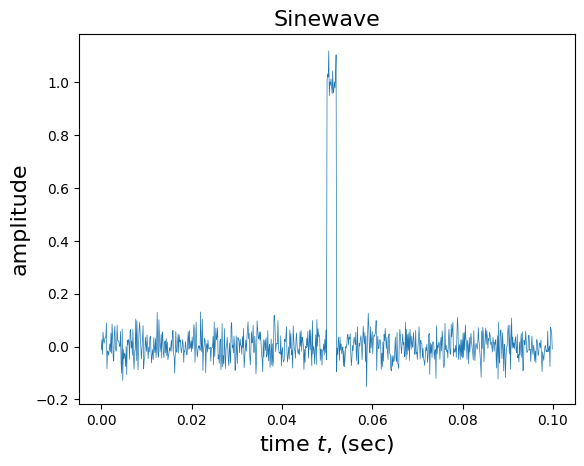

In [3]:
14
fs = 8000
_, x, _ = a3a.noisysignal(t=0, g=a3a.u, fs=fs, tau=0.05, T=0.002, s=0, tscale=1)
t = np.arange(0, 0.1, 1/fs)
zb = np.zeros(int(0.05*fs))
za = np.zeros(int(8000*0.1 - (len(zb) + len(x))))
y = np.concatenate((zb, x, za))

s = a3a.snr2sigma(y, snr=10)
print(f"sigma: {s}")
n = np.random.normal(loc=0, scale=s, size=len(y))
a3a.plot_noisysignal(t=t, y=y+n, title="Sinewave", tunits="sec")

## 4. Grand synthesis

In [5]:
fs = 5000
f = 50
tau = 0
T = 0.04
t0 = 0
size = 40000
s = 0.000005

_, y0, n0 = a3a.noisysignal(t=t0, g=a1b.gammatone, fs=fs, tau=tau, T=T, s=s, f=f)
t, y, n = a3a.extend(t=t0, y=y0, n=n0, fs=fs, T=T, size=size, s=s)
signal = y+n
'''
Ps = a3a.power(y0)
Pn = a3a.power(n0)
print(f"signal start index: {size}/{len(y)}")
print(f"signal end index: {len(signal) - size}/{len(signal)}")
print(f"snr: {round(10*math.log10(a3a.snr(Ps, Pn)), 3)}dB\n")

th = max(signal)/3
start, stop = a3a.extent(y=signal, th=th)
Ps = a3a.power(signal[start:stop])
Pn = a3a.power(np.concatenate((signal[:start], signal[stop:])))
print(f"estimated start index: {start}/{len(signal)}")
print(f"estimated end index: {stop}/{len(signal)}")
print(f"estimated snr: {round(10*math.log10(a3a.snr(Ps, Pn)), 3)}dB")
'''
scipy.io.wavfile.write("sound.wav", rate=44100, data=signal.astype(np.float32)*10000)
IPython.display.Audio("sound.wav")
#a3a.plot_noisysignal(t, signal, title="Gammatone")

c:\Users\hitts\Dropbox\PC\Documents\GitHub\csds464\464-A3a_fxh157_files\../464-A1b_fxh157_files\A1b_fxh157.py:208: RuntimeWarning: invalid value encountered in divide
  return np.array(gt) / math.sqrt(np.linalg.norm(gt))


In [4]:
15
import h5py

with h5py.File("A3a-testdata.h5", 'r') as f:
    print(f.keys())
    a_group_key = list(f.keys())[0]
    #data = f[a_group_key]
    #i50 = data.get('i50')
    #y50 = data.get('y50')

ModuleNotFoundError: No module named 'h5py'